### Tarefa: Re-estimar a gravidade

In [28]:
import pandas as pd
import autograd.numpy as np_
from autograd import grad

In [29]:
df = pd.read_csv('jogadas.csv')
df.head(3)

,Objeto,Tempo (segundos),T^2/2,Altura (cm)
0,caneta,0.72,0.25920,185
1,canetao,0.47,0.11045,156
2,canetao,0.53,0.14045,156


In [30]:
df = df.drop(columns=['Objeto'])
df.head(3)

,Tempo (segundos),T^2/2,Altura (cm)
0,0.72,0.25920,185
1,0.47,0.11045,156
2,0.53,0.14045,156


### y^ = ax

In [45]:
def erro(parametros):
    a, x, y_medido = parametros
    y_calculado = a * x
    eqm = np_.mean((y_calculado - y_medido) ** 2.0)
    return eqm

ym = df['Altura (cm)'].values
xm = df['T^2/2'].values

ym = ym.astype(float) / 100

g = grad(erro)

a_modelo = 0.0

a_list = []
alpha = 0.1

for i in range(100000):
    da, dx, dy = g((a_modelo, xm, ym))
    a_modelo = a_modelo - alpha * da
    a_list.append(a_modelo)

a_modelo

9.667252071796145

### y^ = ax + bx^2 + cx^3

In [46]:
def erro(parametros):
    a, b, c, x, y_medido = parametros
    y_calculado = a * x + b * x ** 2.0 + c * x ** 3.0
    eqm = np_.mean((y_calculado - y_medido) ** 2.0)
    return eqm

ym = df['Altura (cm)'].values
xm = df['T^2/2'].values

ym = ym.astype(float) / 100

g = grad(erro)

a_modelo = 0.0
b_modelo = 0.0
c_modelo = 0.0

a_list = []
b_list = []
c_list = []

alpha = 0.1

for i in range(100000):
    da, db, dc, dx, dy = g((a_modelo, b_modelo, c_modelo, xm, ym))
    a_modelo = a_modelo - alpha * da
    b_modelo = b_modelo - alpha * db
    c_modelo = c_modelo - alpha * dc
    a_list.append(a_modelo)
    b_list.append(b_modelo)
    c_list.append(c_modelo)

print(a_modelo, b_modelo, c_modelo)

16.725654286010233 -32.96923468259445 -13.132334974558432


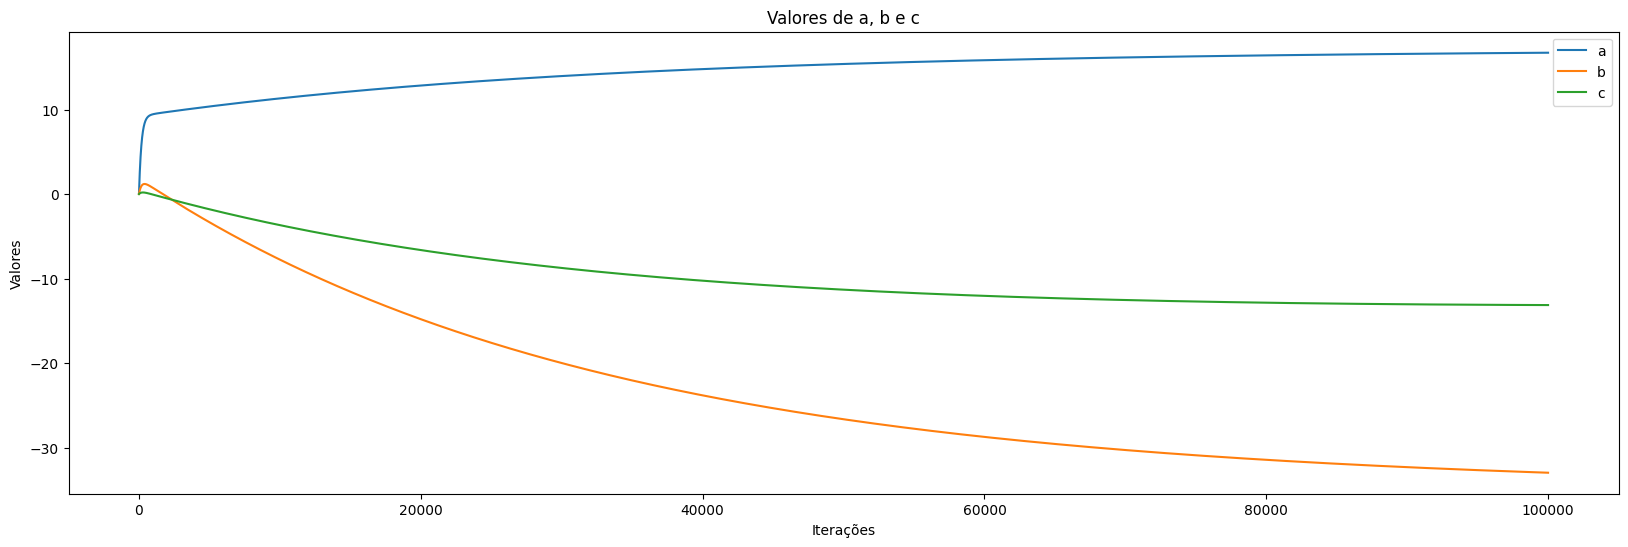

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(a_list, label='a')
plt.plot(b_list, label='b')
plt.plot(c_list, label='c')
plt.title('Valores de a, b e c')
plt.xlabel('Iterações')
plt.ylabel('Valores')
plt.legend()
plt.show()